In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST in TensorFlow

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (optional, but recommended)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Print dataset shape
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


In [4]:
# Add an additional dimension for the channels (grayscale images)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

## Model

In [6]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 289s 152ms/step - accuracy: 0.8259 - loss: 0.5659 - val_accuracy: 0.9869 - val_loss: 0.0417
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 319s 150ms/step - accuracy: 0.9593 - loss: 0.1381 - val_accuracy: 0.9881 - val_loss: 0.0400
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 278s 148ms/step - accuracy: 0.9654 - loss: 0.1143 - val_accuracy: 0.9921 - val_loss: 0.0226
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 322s 149ms/step - accuracy: 0.9728 - loss: 0.0889 - val_accuracy: 0.9935 - val_loss: 0.0187
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 280s 149ms/step - accuracy: 0.9762 - loss: 0.0789 - val_accuracy: 0.9936 - val_loss: 0.0200
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 149ms/step - accuracy: 0.9784 - loss: 0.0707 - val_accuracy: 0.9933 - val_loss: 0.0198
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 323s 149ms/step - accuracy: 0.9788 - loss: 0.0733 - val_accuracy: 0.9950 - val_loss: 0.0158
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 148ms/step - accuracy: 0.9

## Model Evaluation

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9931 - loss: 0.0181
Test Accuracy: 99.50%


In [10]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

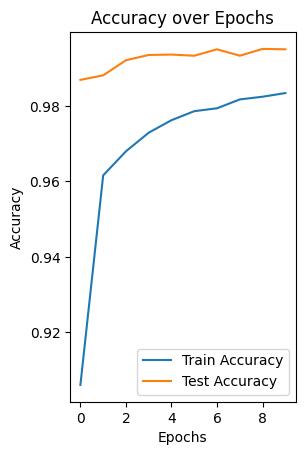

In [11]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

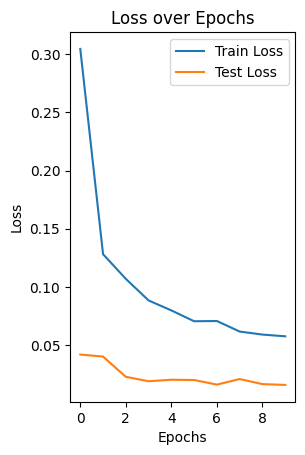

In [12]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
Confusion Matrix:
 [[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   2    1 1026    1    0    0    0    2    0    0]
 [   0    0    0 1006    0    4    0    0    0    0]
 [   0    1    0    0  976    0    2    0    0    3]
 [   0    0    0    3    0  888    1    0    0    0]
 [   1    3    0    0    0    2  952    0    0    0]
 [   0    3    1    0    0    0    0 1024    0    0]
 [   2    0    2    1    1    0    2    0  964    2]
 [   0    0    0    0    5    1    0    2    0 1001]]


In [14]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      0.99      0.99     10000



In [15]:
# Save the model in HDF5 format
model.save('cnn_mnist_model.h5')
print("Model saved as cnn_mnist_model.h5")

Model saved as cnn_mnist_model.h5


## Exporting the Model

In [17]:
# Save the model in the .keras format
model.save('cnn_mnist_model.keras')
print("Model saved as cnn_mnist_model.keras")

Model saved as cnn_mnist_model.keras


In [18]:
# Export the model in the TensorFlow SavedModel format
model.export('saved_model/cnn_mnist_model')
print("Model exported to 'saved_model/cnn_mnist_model'")

Saved artifact at 'saved_model/cnn_mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139295388422160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388425856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388422864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388427264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388425504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388425680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388428848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388431136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388424448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139295388431664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1392

## Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class: 5


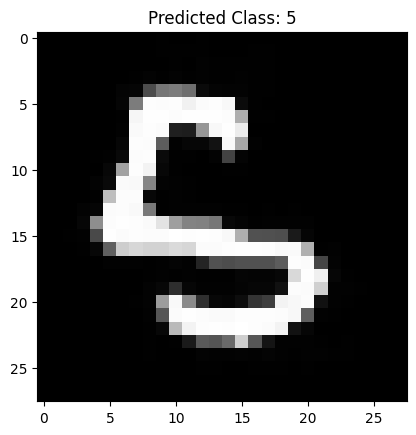

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('cnn_mnist_model.keras')

# Function to preprocess the image
def preprocess_image(img_path):
    # Load the image in grayscale mode, resize to 28x28 pixels (MNIST format)
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Normalize the image (same as during training)
    img_array = img_array / 255.0

    # Expand dimensions to match the input shape of the model (1, 28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

# Path to the image you want to test
img_path = 'test_image/test_image3.png'

# Preprocess the image
img_array = preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Output the predicted class
predicted_class = np.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class[0]}")

# Optionally, show the image
plt.imshow(image.load_img(img_path, target_size=(28, 28), color_mode="grayscale"), cmap='gray')
plt.title(f"Predicted Class: {predicted_class[0]}")
plt.show()
